In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4

In [2]:
pip install 'numpy<2'

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

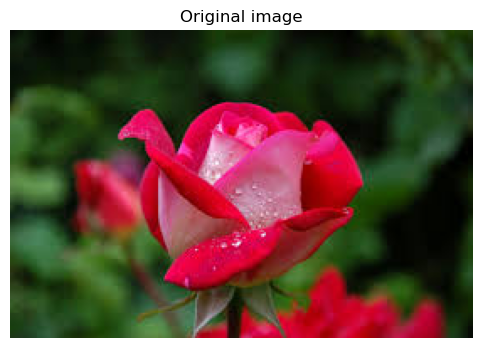

In [6]:

img = cv2.imread('/Users/230363/Downloads/images.jpeg')


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Original image")
plt.axis("off")
plt.show()

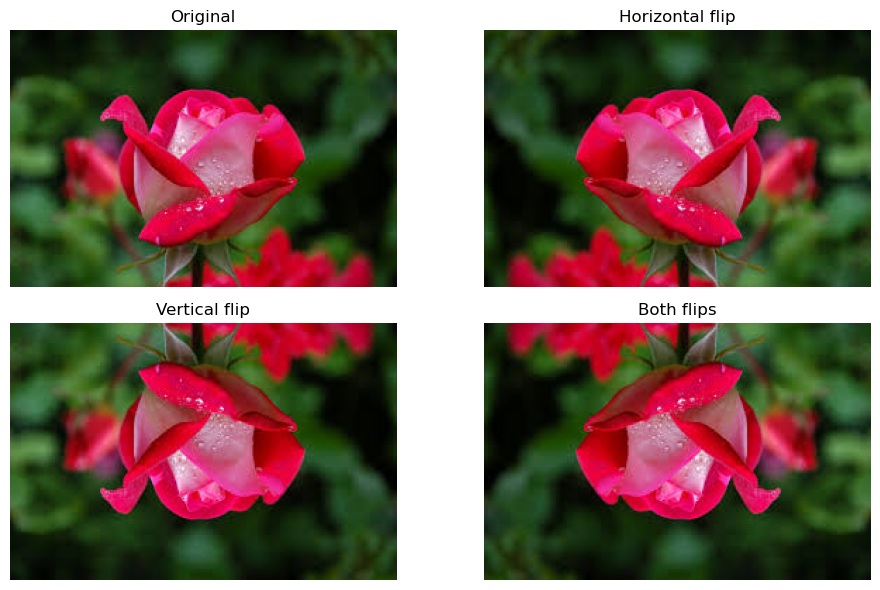

In [7]:
hflip = cv2.flip(img_rgb, 1)


vflip = cv2.flip(img_rgb, 0)


hvflip = cv2.flip(img_rgb, -1)


plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(hflip)
plt.title("Horizontal flip")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(vflip)
plt.title("Vertical flip")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(hvflip)
plt.title("Both flips")
plt.axis("off")

plt.tight_layout()
plt.show()

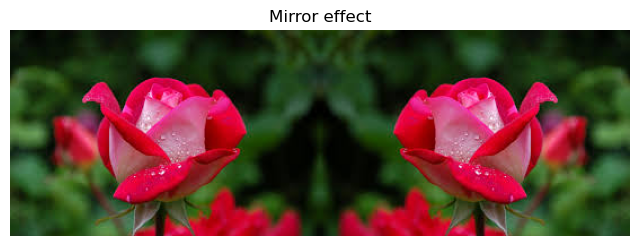

True

In [8]:
mirror = np.concatenate((img_rgb, hflip), axis=1)

plt.figure(figsize=(8,4))
plt.imshow(mirror)
plt.title("Mirror effect")
plt.axis("off")
plt.show()


cv2.imwrite("mirror_output.jpg", cv2.cvtColor(mirror, cv2.COLOR_RGB2BGR))

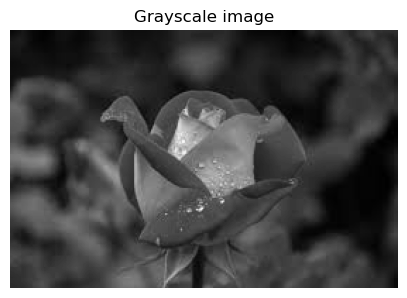

In [9]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()

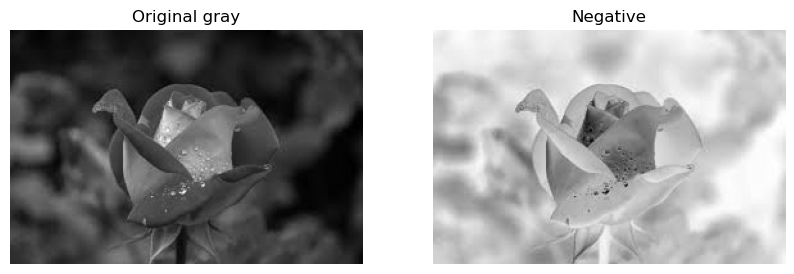

True

In [10]:

negative = 255 - gray

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")
plt.axis("off")

plt.show()


cv2.imwrite("negative.jpg", negative)

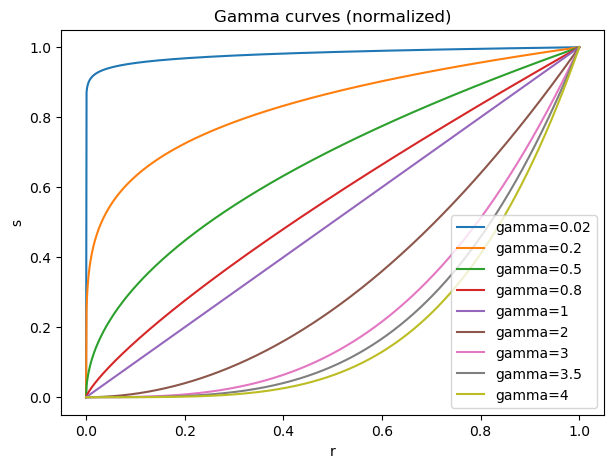

In [11]:

gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

r = np.linspace(0,1,1000)

plt.figure(figsize=(7,5))
for g in gammas:
    s = r**g
    plt.plot(r, s, label=f"gamma={g}")

plt.title("Gamma curves (normalized)")
plt.xlabel("r")
plt.ylabel("s")
plt.legend()
plt.show()

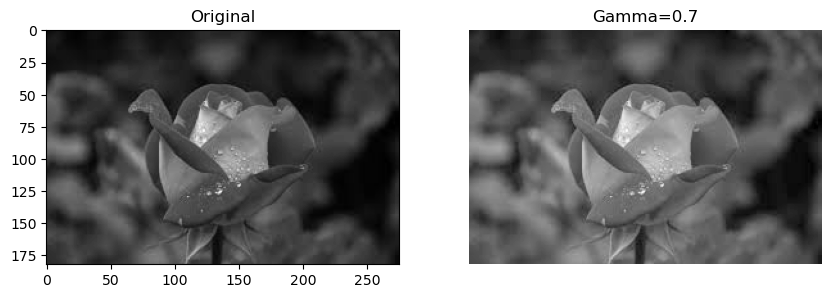

True

In [12]:

gamma = 0.7

gray_norm = gray / 255.0


gamma_img = np.power(gray_norm, gamma)


gamma_img = np.uint8(gamma_img * 255)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma={gamma}")

plt.axis("off")
plt.show()

cv2.imwrite("gamma_output.jpg", gamma_img)

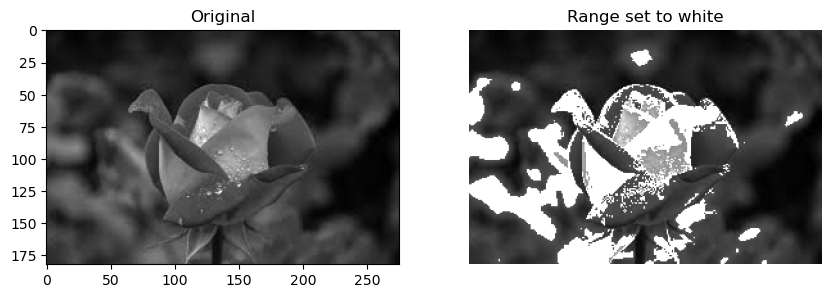

True

In [13]:

A = 80
B = 140

range_img = gray.copy()

mask = (range_img >= A) & (range_img <= B)
range_img[mask] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(range_img, cmap='gray')
plt.title("Range set to white")

plt.axis("off")
plt.show()

cv2.imwrite("range_output.jpg", range_img)